In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression  # solo uso esta en la reg lineal
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
import scipy as sp
import scipy.stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import STL
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn


# Carga de los datos

In [89]:
import os
os.chdir("C:\\Users\\LENOVO\\Desktop\\Universidad\\Series de tiempo\\Series_de_tiempo")

In [90]:
# Cargar el archivo CSV
energia = pd.read_csv("energia.csv")
print(energia)

           fecha  Energia
0     2004-10-01   254046
1     2004-10-02   318280
2     2004-10-03   293620
3     2004-10-04   333971
4     2004-10-05   347423
...          ...      ...
5049  2018-07-29   326291
5050  2018-07-30   362481
5051  2018-07-31   367135
5052  2018-08-01   363979
5053  2018-08-02   371807

[5054 rows x 2 columns]


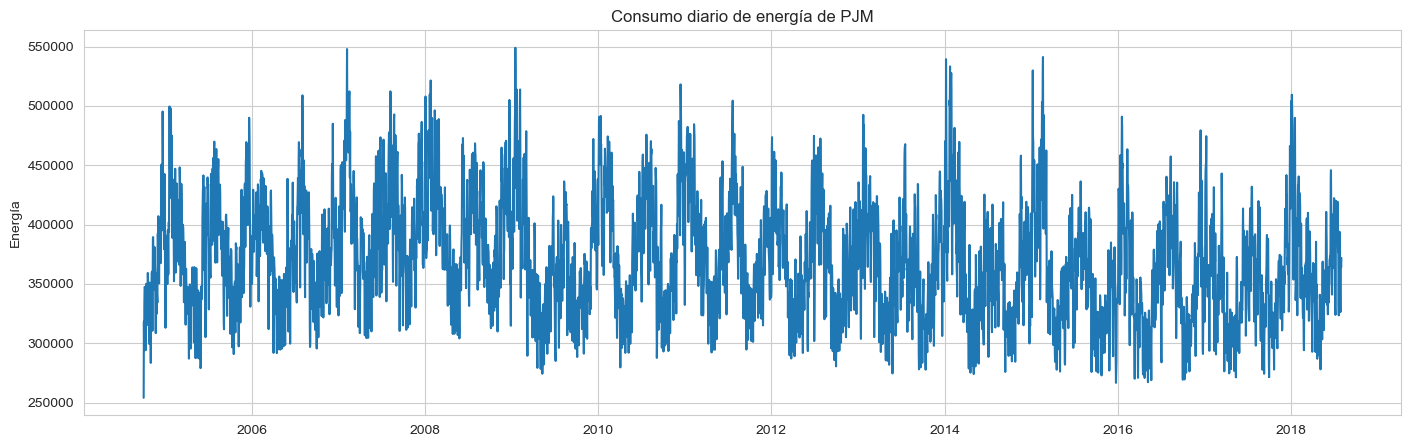

In [91]:
energia['fecha']=pd.to_datetime(energia['fecha']) # pasar a formato fecha
Valores_energia=energia.set_index('fecha') # nuevo dataframe indexado por la fecha
Valores_energia['Energia'] = pd.to_numeric(Valores_energia['Energia'], errors='coerce')
energia_ts=Valores_energia['Energia'] # vector con los valores de la serie

# Serie de tiempo
plt.plot(energia_ts)
plt.title('Consumo diario de energía de PJM')
plt.ylabel('Energía')
plt.show()

In [92]:
indice = pd.date_range(start='1/1/2004', periods=5054, freq='D')
indice
energiats =pd.Series(energia['Energia'].values,index=indice)
energiadf =pd.DataFrame(energia['Energia'].values,index=indice)

# Árboles de decisión

## Creación de variables rezagadas

In [132]:
from pandas import DataFrame

# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

for i in range(1,0,-1):
    df1[['t-'+str(i)]] = energiadf.shift(i)

print(df1)

Empty DataFrame
Columns: []
Index: []
                 t-1
2004-01-01       NaN
2004-01-02  254046.0
2004-01-03  318280.0
2004-01-04  293620.0
2004-01-05  333971.0
...              ...
2017-10-28  345439.0
2017-10-29  326291.0
2017-10-30  362481.0
2017-10-31  367135.0
2017-11-01  363979.0

[5054 rows x 1 columns]


In [133]:
df1['t'] = energiadf.values
print(df1.head(13))

                 t-1       t
2004-01-01       NaN  254046
2004-01-02  254046.0  318280
2004-01-03  318280.0  293620
2004-01-04  293620.0  333971
2004-01-05  333971.0  347423
2004-01-06  347423.0  347392
2004-01-07  347392.0  345767
2004-01-08  345767.0  346574
2004-01-09  346574.0  316377
2004-01-10  316377.0  294234
2004-01-11  294234.0  334600
2004-01-12  334600.0  350135
2004-01-13  350135.0  346924


In [135]:
df1_energia = df1[1:]
print(df1_energia)
df1_energia.size

                 t-1       t
2004-01-02  254046.0  318280
2004-01-03  318280.0  293620
2004-01-04  293620.0  333971
2004-01-05  333971.0  347423
2004-01-06  347423.0  347392
...              ...     ...
2017-10-28  345439.0  326291
2017-10-29  326291.0  362481
2017-10-30  362481.0  367135
2017-10-31  367135.0  363979
2017-11-01  363979.0  371807

[5053 rows x 2 columns]


10106

## Partición de los datos

In [136]:
energiasplit = df1_energia.values
X1= energiasplit[:, 0:-1] 
y1 =energiasplit[:,-1]

In [137]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.10)+1# Set split
testtarget_size = int(len(Y1) * 0.20)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observaciones respuesta: %d' % (len(Y1)))
print('Observaciones para entrenamiento: %d' % (len(train_target)))
print('Observaciones para validación: %d' % (len(val_target)))
print('Observaciones para prueba: %d' % (len(test_target)))

Complete Observations for Target after Supervised configuration: 5053
3537 506 1010
Train + Validation + Test: 5053
Observaciones respuesta: 5053
Observaciones para entrenamiento: 3537
Observaciones para validación: 506
Observaciones para prueba: 1010


In [138]:
trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.10)+1
testfeature_size = int(len(X1) * 0.20)
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 5053
Training Observations for Feature: 3537
Validation Observations for Feature: 506
Test Observations for Feature: 1010


## Modelo de regresión de árboles de decisión

In [139]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_energia = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_energia.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_energia.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_energia.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM es:",(((decision_tree_energia.predict(val_feature)-val_target)**2).mean())**0.5)

Coeficiente R2 sobre el conjunto de entrenamiento: 0.9954964958559707
Coeficiente R2 sobre el conjunto de Validación: 0.4097449076477846
el RECM es: 34771.057455953756


Podemos notar que el $R^2$ sobre el conjunto de entrenamiento es 1, el cual es el mejor valor posible, además, notamos que el $R^2$ para el conjunto de validación es bueno

In [140]:
for d in [2, 3, 4, 5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree_energia = DecisionTreeRegressor(max_depth=d)
    decision_tree_energia.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('\n max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_energia.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_energia.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_energia.predict(val_feature),val_target, squared=False),'\n')


 max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6658483415029792
Coeficiente R2 sobre el conjunto de validación: 0.6379069099585852 

el RECM sobre el conjunto de validación es: 27233.793862222934 


 max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7097063378219218
Coeficiente R2 sobre el conjunto de validación: 0.6851744251888441 

el RECM sobre el conjunto de validación es: 25394.111948551046 


 max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.723631791462201
Coeficiente R2 sobre el conjunto de validación: 0.7012392372255509 

el RECM sobre el conjunto de validación es: 24737.727836712194 


 max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7317391201183263
Coeficiente R2 sobre el conjunto de validación: 0.6675182179901309 

el RECM sobre el conjunto de validación es: 26096.4813372375 


 max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.739156304288221
Coeficiente R2 sobre el conjunto de validac

Se puede notar que el mejor valor de $R^2$ para el conjunto de prueba, corresponde a una profundidad del árbol de jsgbkdnb 

### Juntamos entrenamiento y validación

In [141]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3537, 1)
(506, 1)
(3537,)
(506,)
(4043, 1)
(4043,)


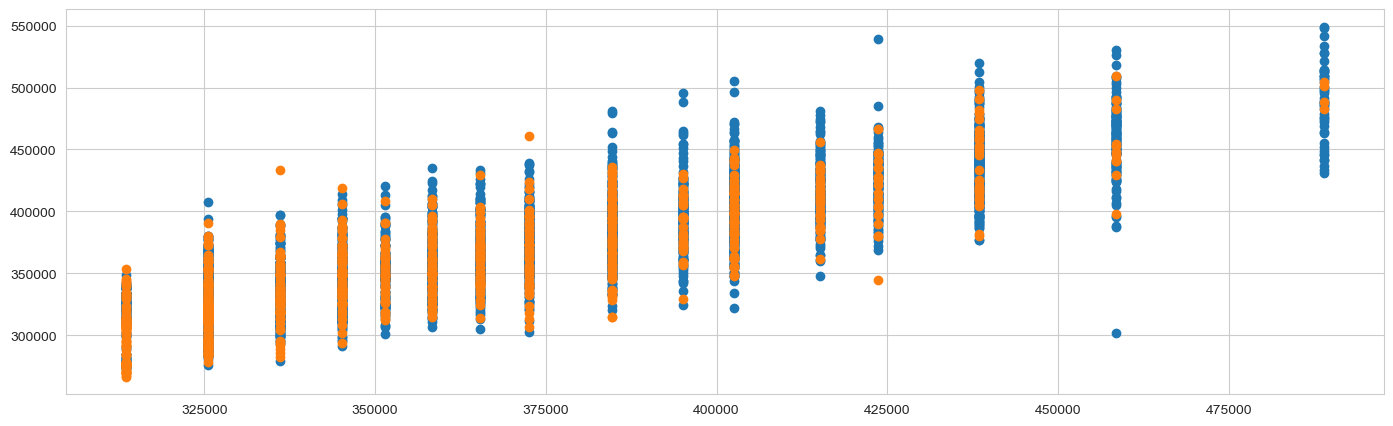

Raíz de la Pérdida cuadrática Entrenamiento: 24541.887821458102
Raíz de la Pérdida cuadrática Prueba: 24187.583840079464


In [142]:
# Prediccion utilizando los datos sumados de entrenamiento y validación y con la profundidad 3.

from matplotlib import pyplot as plt

# UUsando la mejor maxima profundidad

decision_tree_energia = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_energia.fit(train_val_feature, train_val_target)

# Prediciendo valores para entrenamiento y prueba 
train_val_prediction = decision_tree_energia.predict(train_val_feature)
test_prediction = decision_tree_energia.predict(test_feature)

# Comparación de los valores predichos vs los reales 
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))

In [143]:
from sklearn import tree

listacaract=list(df1_energia.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_energia)
print(text_representation)

|--- feature_0 <= 378188.00
|   |--- feature_0 <= 348645.50
|   |   |--- feature_0 <= 328189.50
|   |   |   |--- feature_0 <= 298872.00
|   |   |   |   |--- value: [313578.27]
|   |   |   |--- feature_0 >  298872.00
|   |   |   |   |--- value: [325523.36]
|   |   |--- feature_0 >  328189.50
|   |   |   |--- feature_0 <= 338234.50
|   |   |   |   |--- value: [336032.19]
|   |   |   |--- feature_0 >  338234.50
|   |   |   |   |--- value: [345127.24]
|   |--- feature_0 >  348645.50
|   |   |--- feature_0 <= 360920.50
|   |   |   |--- feature_0 <= 352670.50
|   |   |   |   |--- value: [351439.62]
|   |   |   |--- feature_0 >  352670.50
|   |   |   |   |--- value: [358306.15]
|   |   |--- feature_0 >  360920.50
|   |   |   |--- feature_0 <= 367877.50
|   |   |   |   |--- value: [365440.42]
|   |   |   |--- feature_0 >  367877.50
|   |   |   |   |--- value: [372495.87]
|--- feature_0 >  378188.00
|   |--- feature_0 <= 425589.50
|   |   |--- feature_0 <= 397860.50
|   |   |   |--- feature_0 <

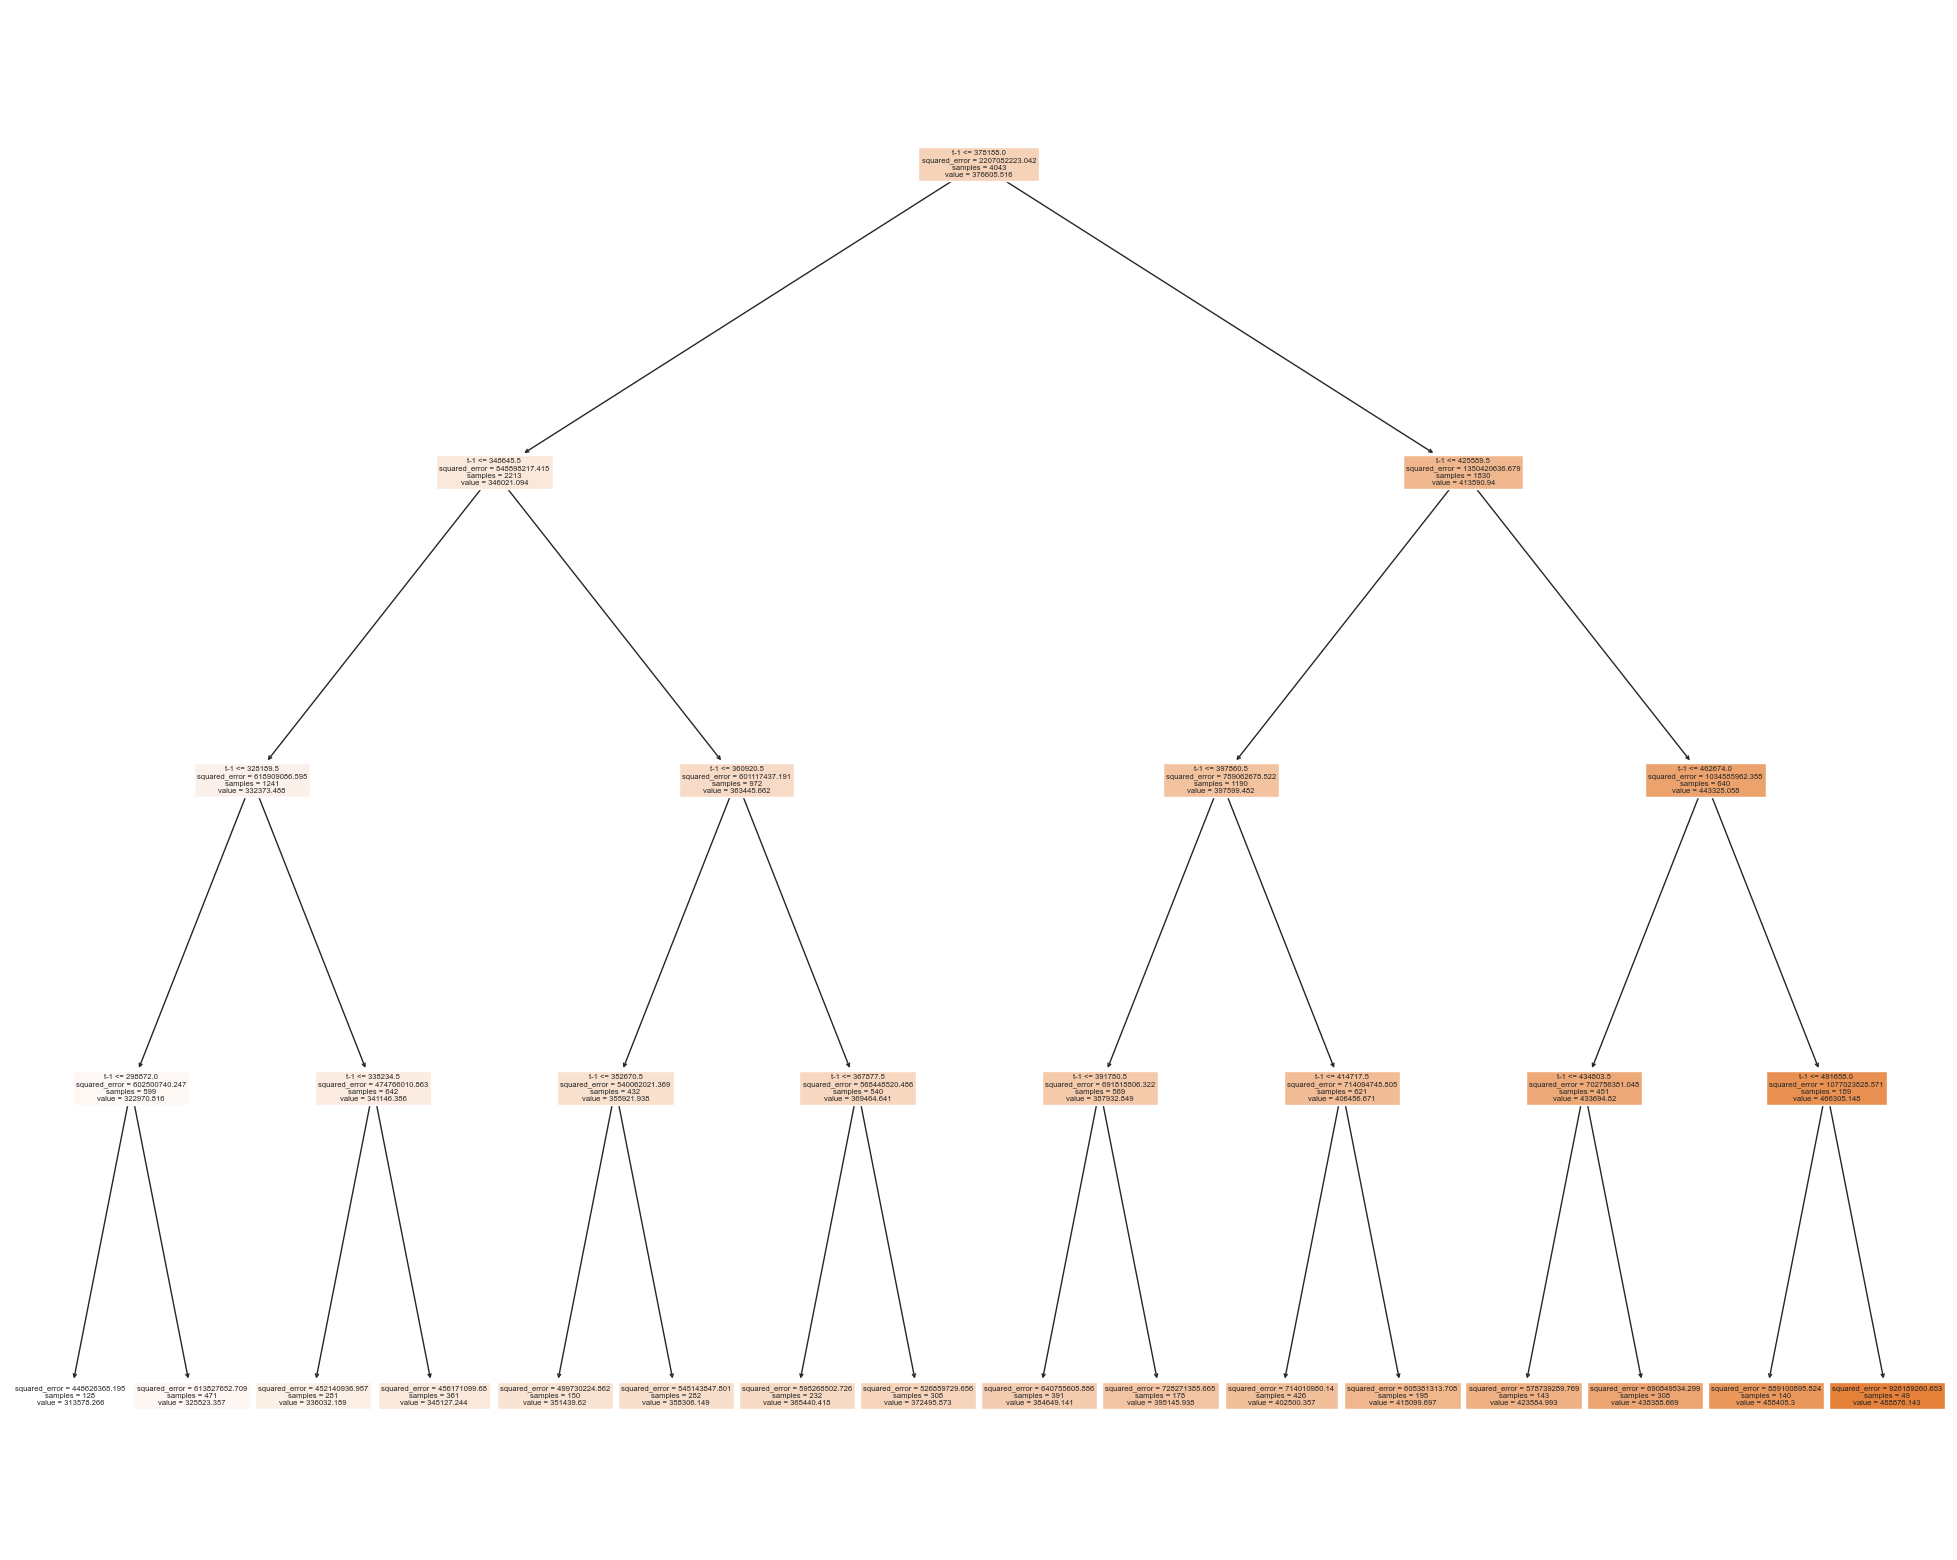

In [144]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_energia, 
                   feature_names=listacaract,  
                   class_names=['t'],
                   filled=True)

In [145]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

4043
4043
1010
1010


In [146]:
indicetrian_val_test=df1_energia.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:3749]
indicetest=indicetrian_val_test[3749:4686]

5053


In [148]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

5053
5053


In [149]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
ObsvsPred.head(10)

,observado,Predicción
2004-01-02,318280.0,313578.265625
2004-01-03,293620.0,325523.356688
2004-01-04,333971.0,313578.265625
2004-01-05,347423.0,336032.188612
2004-01-06,347392.0,345127.243767
2004-01-07,345767.0,345127.243767
2004-01-08,346574.0,345127.243767
2004-01-09,316377.0,345127.243767
2004-01-10,294234.0,325523.356688
2004-01-11,334600.0,313578.265625


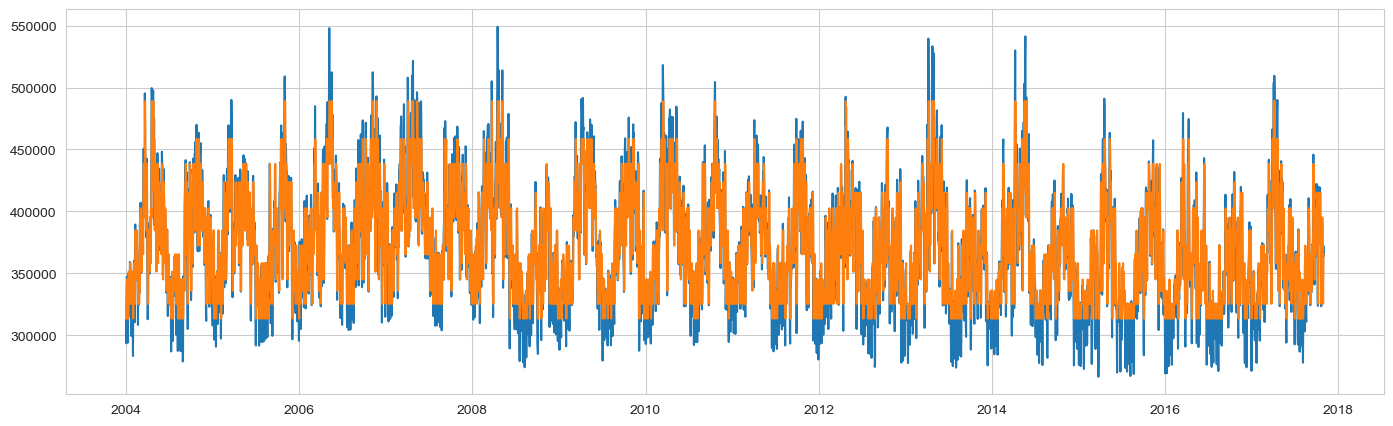

In [150]:
plt.plot(ObsvsPred)

# Redes neuronales

In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

notebookstart= time.time()

Tensorflow Version: 2.14.0
Pandas Version: 2.0.3
Numpy Version: 1.24.3
System Version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [10]:
import IPython
import IPython.display

In [151]:
df=energia
display(df.head())

,fecha,Energia
0,2004-10-01,254046
1,2004-10-02,318280
2,2004-10-03,293620
3,2004-10-04,333971
4,2004-10-05,347423


In [12]:
features_considered = ['Energia']

In [13]:
features = df[features_considered]
features.index = df['fecha']
features.head()

,Energia
fecha,
2004-10-01,254046
2004-10-02,318280
2004-10-03,293620
2004-10-04,333971
2004-10-05,347423


<Axes: xlabel='fecha'>

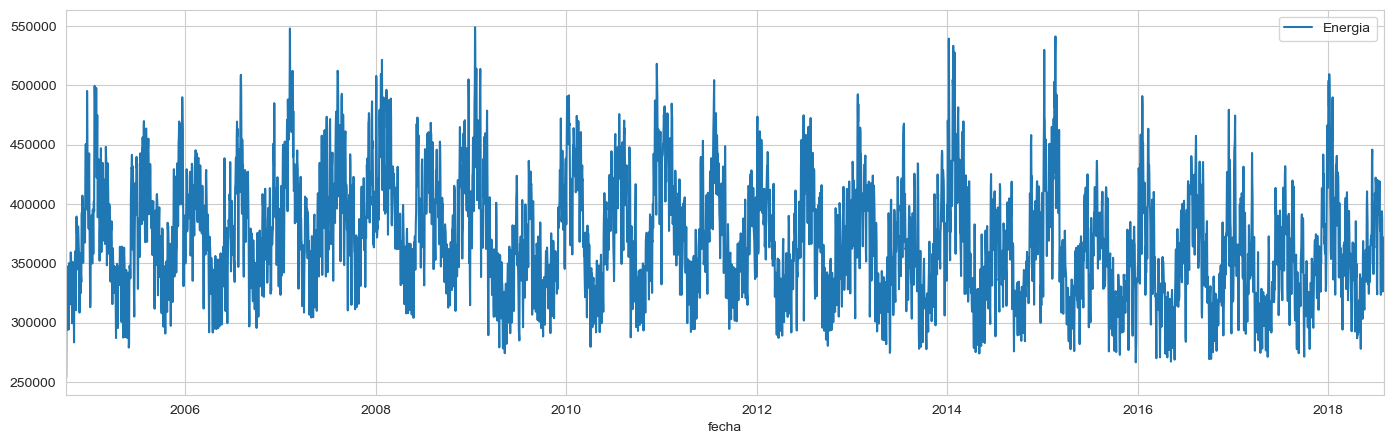

In [14]:
features.plot()

In [202]:
column_indices = {name: i for i, name in enumerate(features.columns)}

n = len(features)
train_df = features[0:int(n*0.7)]
val_df = features[int(n*0.7):int(n*0.8)]
test_df = features[int(n*0.8):]

num_features = features.shape[1]

In [203]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [204]:
train_df

,Energia
fecha,
2004-10-01,-2.670644
2004-10-02,-1.297470
2004-10-03,-1.824644
2004-10-04,-0.962033
2004-10-05,-0.674461
...,...
2014-06-03,0.052573
2014-06-04,-0.307556
2014-06-05,-0.754734


In [205]:
print("longitud dataframe entrenamiento:",train_df.shape)
print("longitud dataframe validación:",val_df.shape)
print("longitud dataframe prueba:",test_df.shape)

longitud dataframe entrenamiento: (3537, 1)
longitud dataframe validación: (506, 1)
longitud dataframe prueba: (1011, 1)


# Window Generator

In [206]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


# Split

In [207]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

# Objetos a tensor flow

In [208]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=128,) ##### Tamaño del lote

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [209]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Definir las gráficas

In [210]:
def plot(self, model=None, plot_col='Energia', max_subplots=2):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

# Configuración para el modelo de los ajustes

In [211]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# Empezar

In [212]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Energia'])# La variable a predecir es T (degC)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Energia']

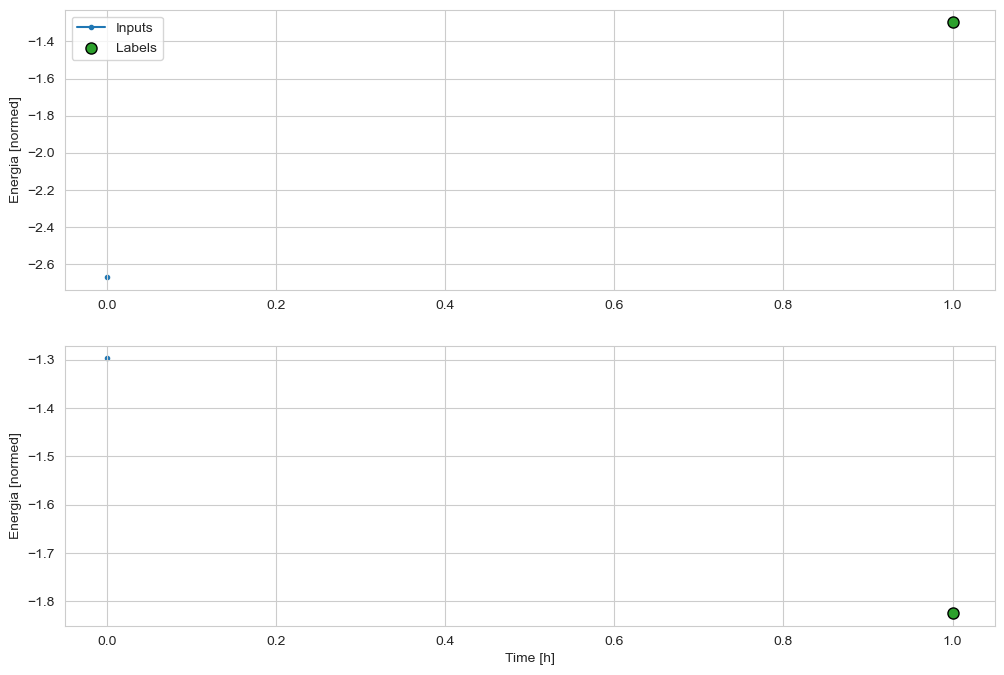

In [213]:
single_step_window.plot()

In [214]:
i=1
for batch in single_step_window.train.take(2):
    inputs, targets = batch
    print("Covariable o input del lote",i,inputs)
    print("Respuesta o etiqueta del lote ",i,targets)
    print("tipo de objeto inputs del lote",i,type(inputs))
    i=i+1

Covariable o input del lote 1 tf.Tensor(
[[[-2.6706438 ]]

 [[-1.2974703 ]]

 [[-1.8246437 ]]

 [[-0.9620333 ]]

 [[-0.67446077]]

 [[-0.6751235 ]]

 [[-0.70986223]]

 [[-0.69261044]]

 [[-1.338152  ]]

 [[-1.8115178 ]]

 [[-0.9485867 ]]

 [[-0.6164845 ]]

 [[-0.6851283 ]]

 [[-0.6690095 ]]

 [[-0.62644655]]

 [[-1.0188551 ]]

 [[-1.3571568 ]]

 [[-0.42218286]]

 [[-0.4265653 ]]

 [[-0.6395938 ]]

 [[-0.713924  ]]

 [[-0.69622326]]

 [[-1.2047126 ]]

 [[-1.6986223 ]]

 [[-0.8664323 ]]

 [[-0.595962  ]]

 [[-0.6682185 ]]

 [[-0.72439903]]

 [[-0.75580287]]

 [[-1.3297292 ]]

 [[-2.042525  ]]

 [[-0.9536318 ]]

 [[-0.63613063]]

 [[-0.60759145]]

 [[-0.42757004]]

 [[-0.39759853]]

 [[-0.78953683]]

 [[-1.4630618 ]]

 [[-0.64549404]]

 [[ 0.21495733]]

 [[ 0.22447039]]

 [[-0.08871253]]

 [[-0.078494  ]]

 [[-0.5909168 ]]

 [[-0.72662234]]

 [[ 0.02950601]]

 [[ 0.0448338 ]]

 [[-0.18360803]]

 [[-0.31954864]]

 [[-0.44747266]]

 [[-1.1320071 ]]

 [[-1.5063944 ]]

 [[-0.6318551 ]]

 [[-0

In [215]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [216]:
baseline = Baseline(label_index=column_indices['Energia'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

4/4 [==============================] - 0s 9ms/step - loss: 0.3003 - mean_absolute_error: 0.4194


In [217]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,label_columns=['Energia'])


wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Energia']

In [218]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (128, 30, 1)
Output shape: (128, 30, 1)


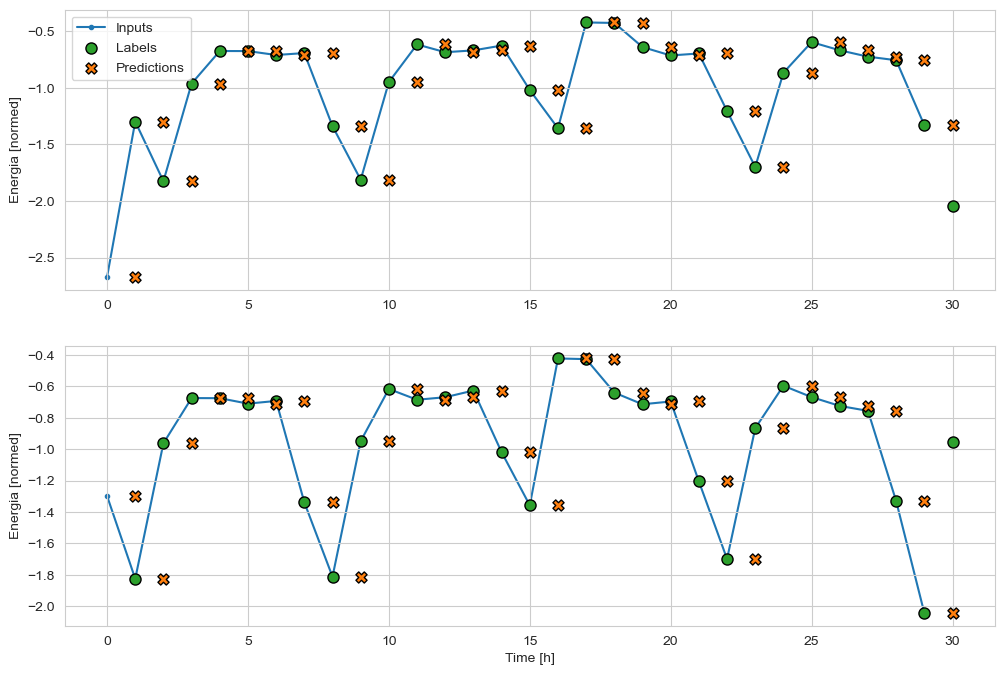

In [219]:
wide_window.plot(baseline)

# Multicapa

## Tuning o búsqueda de los hiperparámetros

In [220]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [221]:
for batch in single_step_window.train.take(1):
    inputs_train,targets_train = batch
    
print("Input shape:", inputs_train.numpy().shape)
print("Target shape:", targets_train.numpy().shape)

Input shape: (128, 1, 1)
Target shape: (128, 1, 1)


In [222]:
for batch in single_step_window.val.take(1):
    inputs_val,targets_val = batch

print("Input shape:", inputs_val.numpy().shape)
print("Target shape:", targets_val.numpy().shape)

Input shape: (128, 1, 1)
Target shape: (128, 1, 1)


In [223]:
single_step_window.train.element_spec

(TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [224]:
input_dataset_train = single_step_window.train.map(lambda x,y: x)
target_dataset_train = single_step_window.train.map(lambda x,y: y)

In [225]:
input_dataset_train

<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>

In [226]:
input_dataset_val = single_step_window.val.map(lambda x,y: x)
target_dataset_val = single_step_window.val.map(lambda x,y: y)

In [227]:
print(input_dataset_val)
print(target_dataset_val)

<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>


In [228]:
input_dataset_test = single_step_window.test.map(lambda x,y: x)
target_dataset_test = single_step_window.test.map(lambda x,y: y)

In [229]:
print(input_dataset_test)
print(target_dataset_test)

<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>


In [230]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=564, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=564, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

In [231]:
tuner_RandomSearch_mlp = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [232]:
tuner_RandomSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 564, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 564, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [233]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=0)

In [234]:
tuner_RandomSearch_mlp.search((single_step_window.train), epochs=5, validation_data=(single_step_window.val),callbacks=[stop_early])


Trial 3 Complete [00h 00m 06s]
val_loss: 0.2788662910461426

Best val_loss So Far: 0.2788662910461426
Total elapsed time: 00h 00m 17s


In [235]:
# Get the top 2 models.
models_mlp = tuner_RandomSearch_mlp.get_best_models(num_models=2)
best_model_mlp = models_mlp[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model_mlp.build(input_shape=(128, 1, 1))
best_model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (128, 1, 192)             384       
                                                                 
 dense_1 (Dense)             (128, 1, 384)             74112     
                                                                 
 dense_2 (Dense)             (128, 1, 512)             197120    
                                                                 
 dense_3 (Dense)             (128, 1, 32)              16416     
                                                                 
 dense_4 (Dense)             (128, 1, 416)             13728     
                                                                 
 dense_5 (Dense)             (128, 1, 224)             93408     
                                                                 
 dropout (Dropout)           (128, 1, 224)             0

In [236]:
tuner_RandomSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
num_units: 192
activation: tanh
num_layers: 5
units_0: 384
dropout: True
lr: 0.002075046661529221
units_1: 512
units_2: 32
units_3: 416
units_4: 224
Score: 0.2788662910461426

Trial 1 summary
Hyperparameters:
num_units: 512
activation: tanh
num_layers: 5
units_0: 480
dropout: True
lr: 0.0002086455824972007
units_1: 256
units_2: 384
units_3: 32
units_4: 512
Score: 0.2824493944644928

Trial 0 summary
Hyperparameters:
num_units: 512
activation: relu
num_layers: 5
units_0: 256
dropout: True
lr: 0.002857964840402147
units_1: 32
units_2: 32
units_3: 32
units_4: 32
Score: 0.2877506613731384


In [237]:
train_plus_val=single_step_window.train.concatenate(single_step_window.val)###verificar que en efecto

In [238]:
train_plus_val

<_ConcatenateDataset element_spec=(TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [239]:
# Get the top 2 hyperparameters.
best_hps_mlp = tuner_RandomSearch_mlp.get_best_hyperparameters(5)
# Build the model with the best hp.
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(train_plus_val, epochs=10,callbacks=[callback])

Epoch 1/10
32/32 [==============================] - 4s 16ms/step - loss: 0.5898 - mean_squared_error: 0.5898
Epoch 2/10
32/32 [==============================] - 0s 13ms/step - loss: 0.2971 - mean_squared_error: 0.2971
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 0.2937 - mean_squared_error: 0.2937
Epoch 4/10
32/32 [==============================] - 0s 12ms/step - loss: 0.2934 - mean_squared_error: 0.2934
Epoch 5/10
32/32 [==============================] - 0s 13ms/step - loss: 0.2920 - mean_squared_error: 0.2920
Epoch 6/10
32/32 [==============================] - 0s 13ms/step - loss: 0.2919 - mean_squared_error: 0.2919
Epoch 7/10
32/32 [==============================] - 0s 12ms/step - loss: 0.2930 - mean_squared_error: 0.2930
Epoch 8/10
32/32 [==============================] - 0s 13ms/step - loss: 0.2947 - mean_squared_error: 0.2947
Epoch 9/10
32/32 [==============================] - 0s 12ms/step - loss: 0.2913 - mean_squared_error: 0.2913
Epoch 10/10
32/32 [

In [240]:
print(model_mlp.layers[0].weights)

[<tf.Variable 'dense_7/kernel:0' shape=(1, 192) dtype=float32, numpy=
array([[ 0.0613349 , -0.0009613 , -0.00378836, -0.07703441,  0.01485617,
        -0.11387754,  0.11349212,  0.09937211,  0.15445238,  0.08916605,
         0.00103481, -0.02154163, -0.03599807, -0.15754388,  0.1305232 ,
        -0.00036765, -0.03509936,  0.13142602,  0.0309007 , -0.06955456,
         0.12077623, -0.1040573 ,  0.14081864, -0.14058913, -0.07209987,
        -0.06611899,  0.00161412,  0.056031  ,  0.03806325, -0.00294224,
         0.11850674, -0.08274958, -0.01363712, -0.10295813, -0.08895073,
         0.06397878, -0.07696889, -0.04214371, -0.00767693,  0.0087718 ,
         0.06589743,  0.07501902,  0.0110253 , -0.00486357,  0.11206219,
         0.105802  ,  0.04409967,  0.15047392, -0.00245614,  0.03418067,
         0.10291471, -0.00037853, -0.1366052 , -0.13991371, -0.09387528,
         0.13363552, -0.10609371,  0.06736443, -0.05007575, -0.14221671,
        -0.0037297 , -0.1155523 , -0.04277826,  0.0179

In [241]:
print(model_mlp.layers[0].bias.numpy())

[-1.10193789e-02 -9.74498689e-04  3.59784369e-03  2.56071519e-03
 -7.99221080e-03  1.00807594e-02 -5.59148612e-03 -1.19527848e-02
 -1.22823128e-02 -8.52184556e-03 -1.00411999e-03  6.37283036e-03
  1.08495057e-02  8.75913445e-03 -1.30622452e-02 -1.49156351e-03
  8.79404787e-03 -1.12216780e-02 -7.96015561e-03  2.82381708e-03
 -9.53249633e-03  4.82367119e-03 -1.10195801e-02  1.38993906e-02
  1.09309712e-02  8.00064579e-03  2.52602505e-03 -1.28925056e-03
 -6.78094057e-03  4.81097726e-03 -1.13734435e-02  1.54039841e-02
  1.64271321e-03  1.00467596e-02  8.09899531e-03 -6.97428593e-03
  8.74962285e-03  1.17533617e-02 -2.45190435e-03 -5.94775891e-03
 -8.01323727e-03 -8.38084891e-03 -4.30212868e-03  3.74468649e-03
 -3.69988685e-03 -3.11281998e-03 -5.85463922e-03 -1.09803267e-02
 -2.24510767e-03 -7.25465966e-03 -1.21966721e-02  1.98922027e-03
  3.41698388e-03  8.17652792e-03  3.28306877e-03 -7.75685254e-03
  1.25388252e-02 -1.34445052e-03  3.74754705e-03  5.31798601e-03
 -1.04737619e-03  4.74253

In [242]:
model_mlp.evaluate(single_step_window.test, verbose=1)

8/8 [==============================] - 1s 13ms/step - loss: 0.2487 - mean_squared_error: 0.2487


[0.2487042248249054, 0.2487042248249054]

In [243]:
model_mlp.predict(single_step_window.test).flatten()

8/8 [==============================] - 1s 8ms/step


array([-1.044505  , -1.0333668 , -1.2011865 , ..., -0.46116135,
       -0.36589625, -0.43077442], dtype=float32)

In [244]:
prediction_test=(model_mlp.predict(single_step_window.test, verbose=1)*train_std['Energia']+train_mean['Energia'])

8/8 [==============================] - 0s 6ms/step


In [245]:
print(prediction_test.shape)
print(prediction_test)

(1010, 1, 1)
[[[330113.16]]

 [[330634.2 ]]

 [[322783.94]]

 ...

 [[357400.7 ]]

 [[361856.97]]

 [[358822.12]]]


In [246]:
i=1
for batch in target_dataset_test.take(8): # pongo 4 porque me slaieron 4 lotes
    if i==1:
        targets_test = batch.numpy()
    elif i>1:
        targets_test_aux = batch.numpy()
        targets_test=np.append(targets_test,targets_test_aux)
    i=i+1

In [248]:
print(targets_test.shape)
true_series=targets_test*train_std['Energia']+train_mean['Energia']
true_series=true_series.reshape((1010,1,1))
print(true_series.shape)

(1010,)
(1010, 1, 1)


In [249]:
errors_squared=tf.keras.metrics.mean_squared_error(true_series, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

RECM: 23328.19341483605


In [250]:
test_index=test_df.index[:1010]
test_index.values

array(['2015-10-27T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-10-29T00:00:00.000000000', ...,
       '2018-07-30T00:00:00.000000000', '2018-07-31T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [251]:
true_series_final=true_series.reshape(1010)
prediction_test_final=prediction_test.reshape(1010)

Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

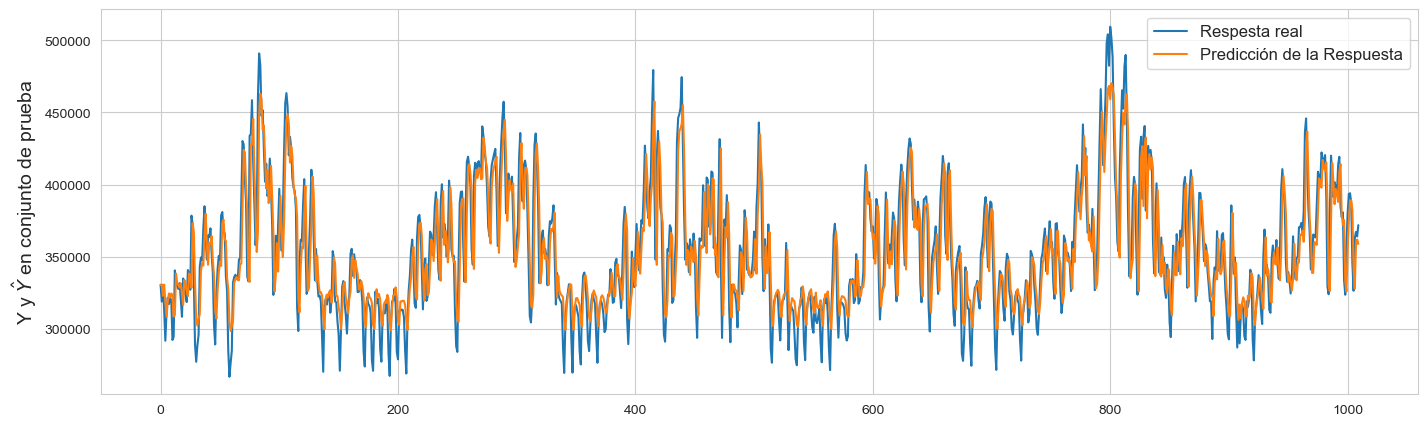

In [252]:
plt.plot(true_series_final)
plt.plot(prediction_test_final)
plt.legend(['Respesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)